In [115]:
import zipfile
import os

# Specify the path to your zip file and the directory to extract to
zip_file_path = "/content/drive/MyDrive/Dermatology_Dataset.zip"  # Replace with your .zip file path
extract_to = "/content/Dermatology_Dataset"   # Replace with your desired extract directory

# Create the extract directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to {extract_to}")


Dataset extracted to /content/Dermatology_Dataset


In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


In [117]:

# Load the dataset
data = pd.read_csv("/content/Dermatology_Dataset/dermatology_database_1.csv", header=None)


In [118]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
1,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
2,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
3,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
4,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1


In [119]:

# Replace '?' with NaN
data = data.replace('?', np.nan)


In [120]:

# Convert all columns to numeric, coercing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')


In [121]:

# Assuming 'data' is your DataFrame
X = data.drop(columns=[data.columns[-1]])  # Features (all columns except the last)
y = data[data.columns[-1]]  # Target variable (last column)


In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Import MinMaxScaler

# Apply MinMaxScaler to scale features to a specific range (e.g., 0-1)
scaler = MinMaxScaler()  # Use MinMaxScaler instead of StandardScaler
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# ... (rest of the code for outlier removal, splitting, imputing, etc.)

In [123]:

# Remove rows with NaN values in the target variable (y)
data = data.dropna(subset=[data.columns[-1]])
X = data.drop(columns=[data.columns[-1]])  # Features (all columns except the last)
y = data[data.columns[-1]]  # Target variable (last column)


In [124]:


# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [125]:

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [126]:

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels


In [127]:

# Train the classifier
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [128]:

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)


In [129]:

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.9594594594594594


In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [131]:

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters


In [132]:

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [133]:
# Make predictions on the test set using the trained RandomForest classifier
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.9864864864864865


In [134]:
from sklearn.ensemble import IsolationForest

# Create IsolationForest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed

# Fit the model to your training data
iso_forest.fit(X_train)

# Get outlier predictions for both training and testing data
outlier_predictions_train = iso_forest.predict(X_train)
outlier_predictions_test = iso_forest.predict(X_test)

# Identify inlier indices for both training and testing data
inlier_indices_train = [i for i, prediction in enumerate(outlier_predictions_train) if prediction == 1]
inlier_indices_test = [i for i, prediction in enumerate(outlier_predictions_test) if prediction == 1]

# Remove outliers from training and testing data
X_train_no_outliers = X_train[inlier_indices_train]
y_train_no_outliers = y_train.iloc[inlier_indices_train]
X_test_no_outliers = X_test[inlier_indices_test]
y_test_no_outliers = y_test.iloc[inlier_indices_test]

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Import MinMaxScaler

# Apply MinMaxScaler to scale features to a specific range (e.g., 0-1)
scaler = MinMaxScaler()  # Use MinMaxScaler instead of StandardScaler
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# ... (rest of the code for outlier removal, splitting, imputing, etc.)

# Create and train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_no_outliers,y_train_no_outliers)
y_pred_svm = svm_classifier.predict(X_test_no_outliers)
accuracy_svm = accuracy_score(y_test_no_outliers, y_pred_svm)
print(f"SVM Accuracy (without outliers): {accuracy_svm}")

# Create and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_rf = rf_classifier.predict(X_test_no_outliers)
accuracy_rf = accuracy_score(y_test_no_outliers, y_pred_rf)
print(f"Random Forest Accuracy (without outliers): {accuracy_rf}")

SVM Accuracy (without outliers): 0.9571428571428572
Random Forest Accuracy (without outliers): 0.9857142857142858


In [143]:
# For SVM model:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Get SVM predictions first
svm_predictions = svm_classifier.predict(X_test_no_outliers)  # Assuming you want predictions without outliers

# Now calculate the metrics
svm_cm = confusion_matrix(y_test_no_outliers, svm_predictions) # Use y_test_no_outliers for consistency
svm_precision = precision_score(y_test_no_outliers, svm_predictions, average='weighted')
svm_recall = recall_score(y_test_no_outliers, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test_no_outliers, svm_predictions, average='weighted')

print("SVM Confusion Matrix:\n", svm_cm)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)

SVM Confusion Matrix:
 [[27  0  0  0  0  1]
 [ 0  9  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  2]]
SVM Precision: 0.9623376623376625
SVM Recall: 0.9571428571428572
SVM F1 Score: 0.957965367965368


In [144]:
# For Random Forest model:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Get Random Forest predictions first
rf_predictions = rf_classifier.predict(X_test_no_outliers)  # Predictions without outliers

# Now calculate the metrics
rf_cm = confusion_matrix(y_test_no_outliers, rf_predictions)
rf_precision = precision_score(y_test_no_outliers, rf_predictions, average='weighted')
rf_recall = recall_score(y_test_no_outliers, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test_no_outliers, rf_predictions, average='weighted')

print("Random Forest Confusion Matrix:\n", rf_cm)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)

Random Forest Confusion Matrix:
 [[28  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
Random Forest Precision: 0.9871428571428571
Random Forest Recall: 0.9857142857142858
Random Forest F1 Score: 0.9856140350877194


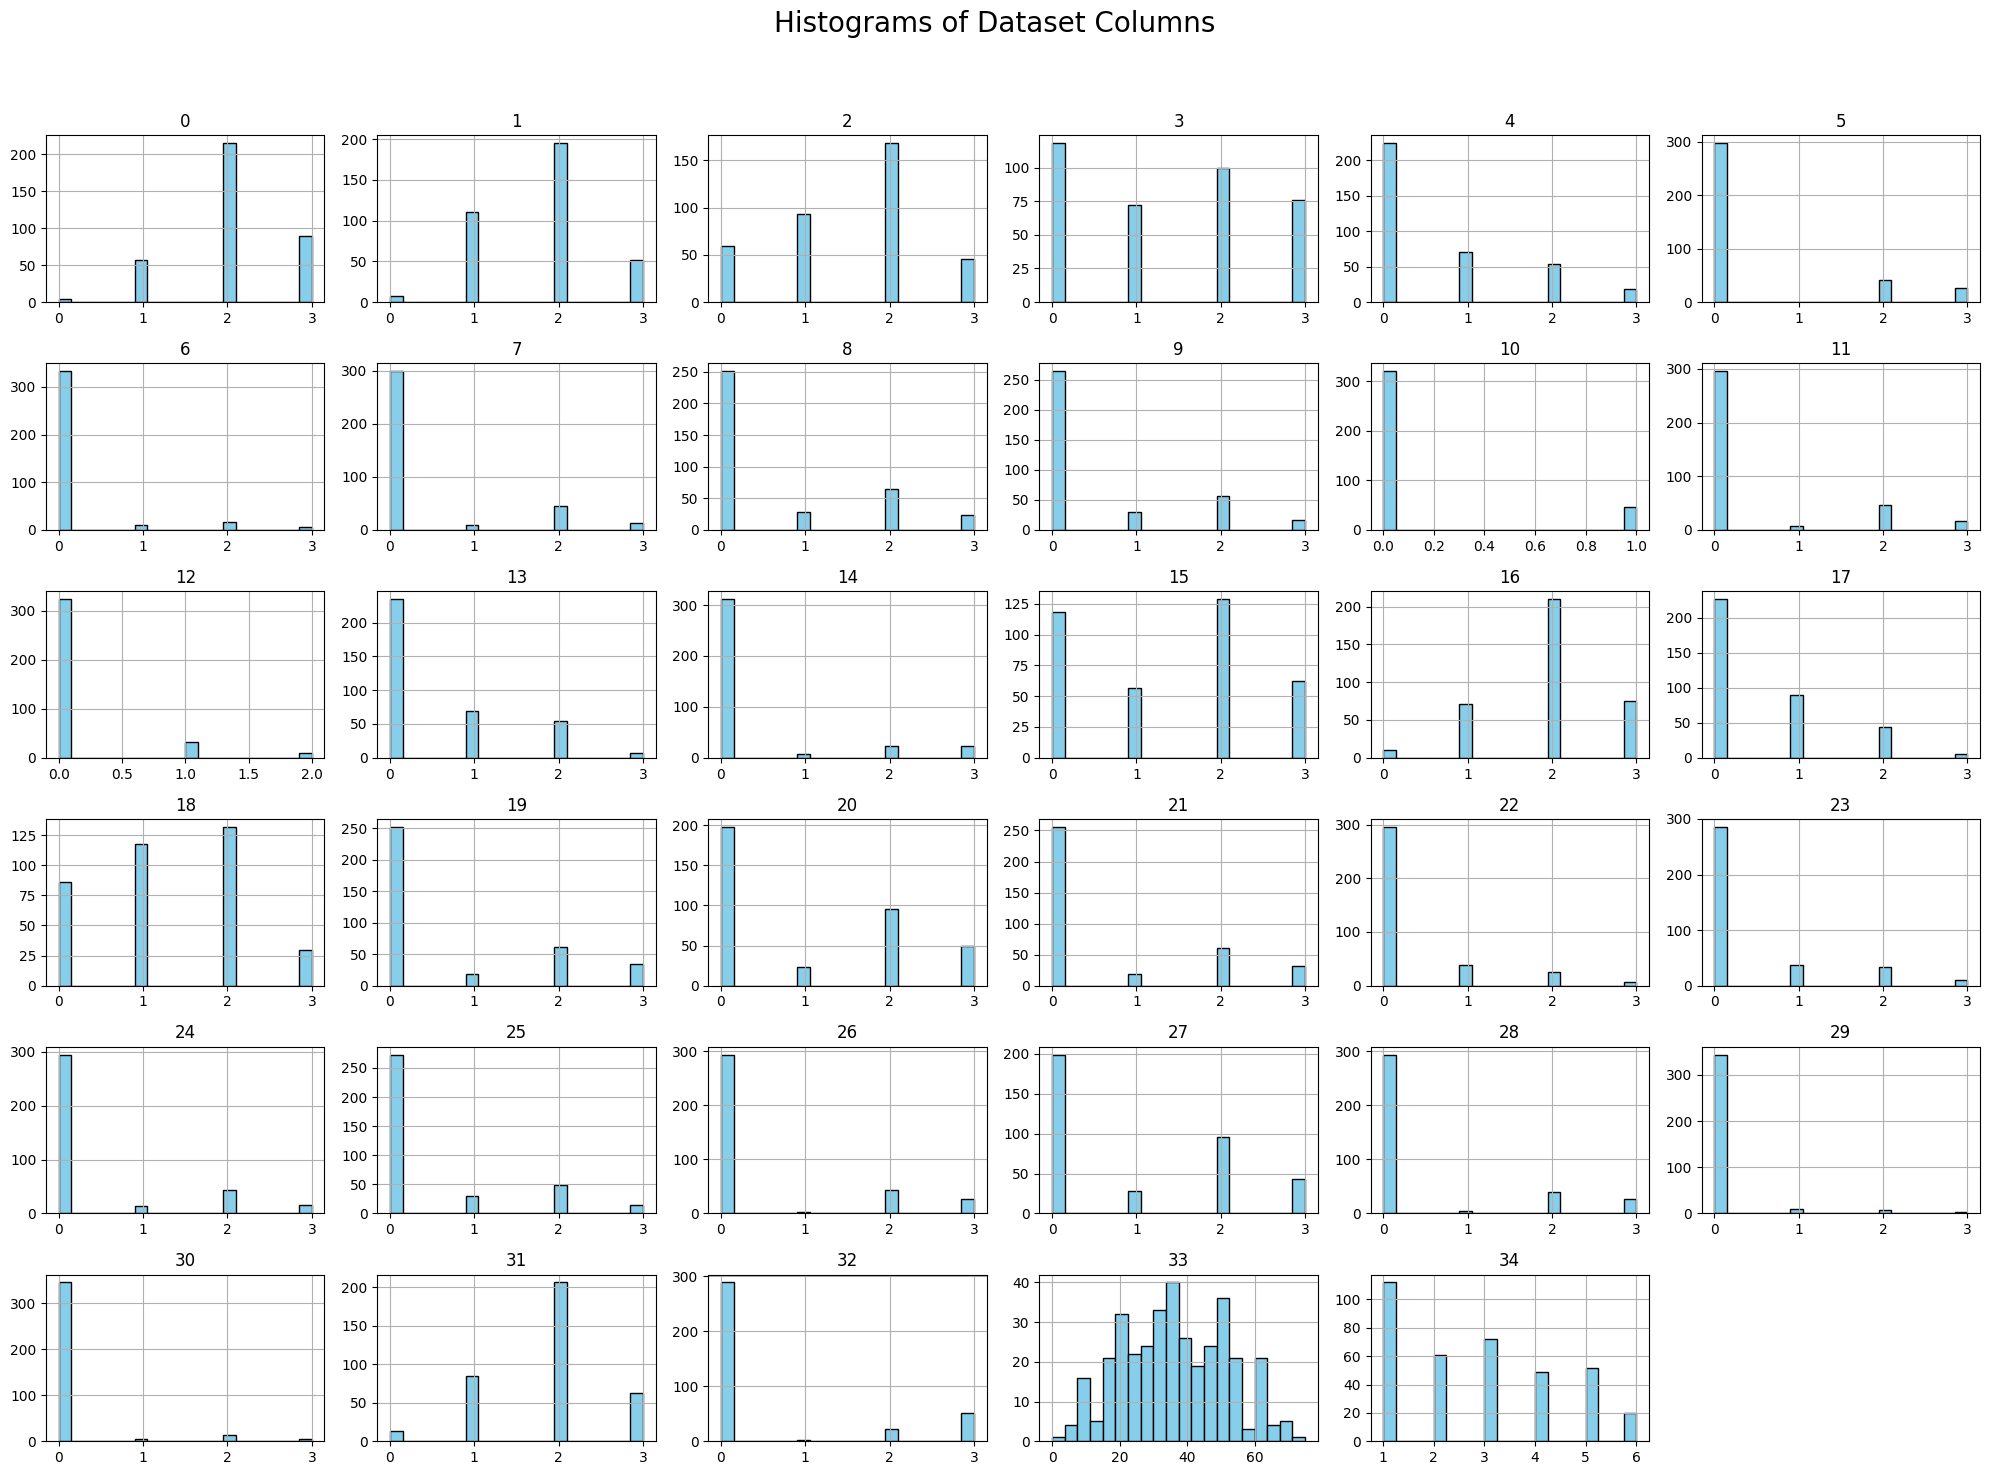

In [145]:
# Plot histograms for each column
data.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Dataset Columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


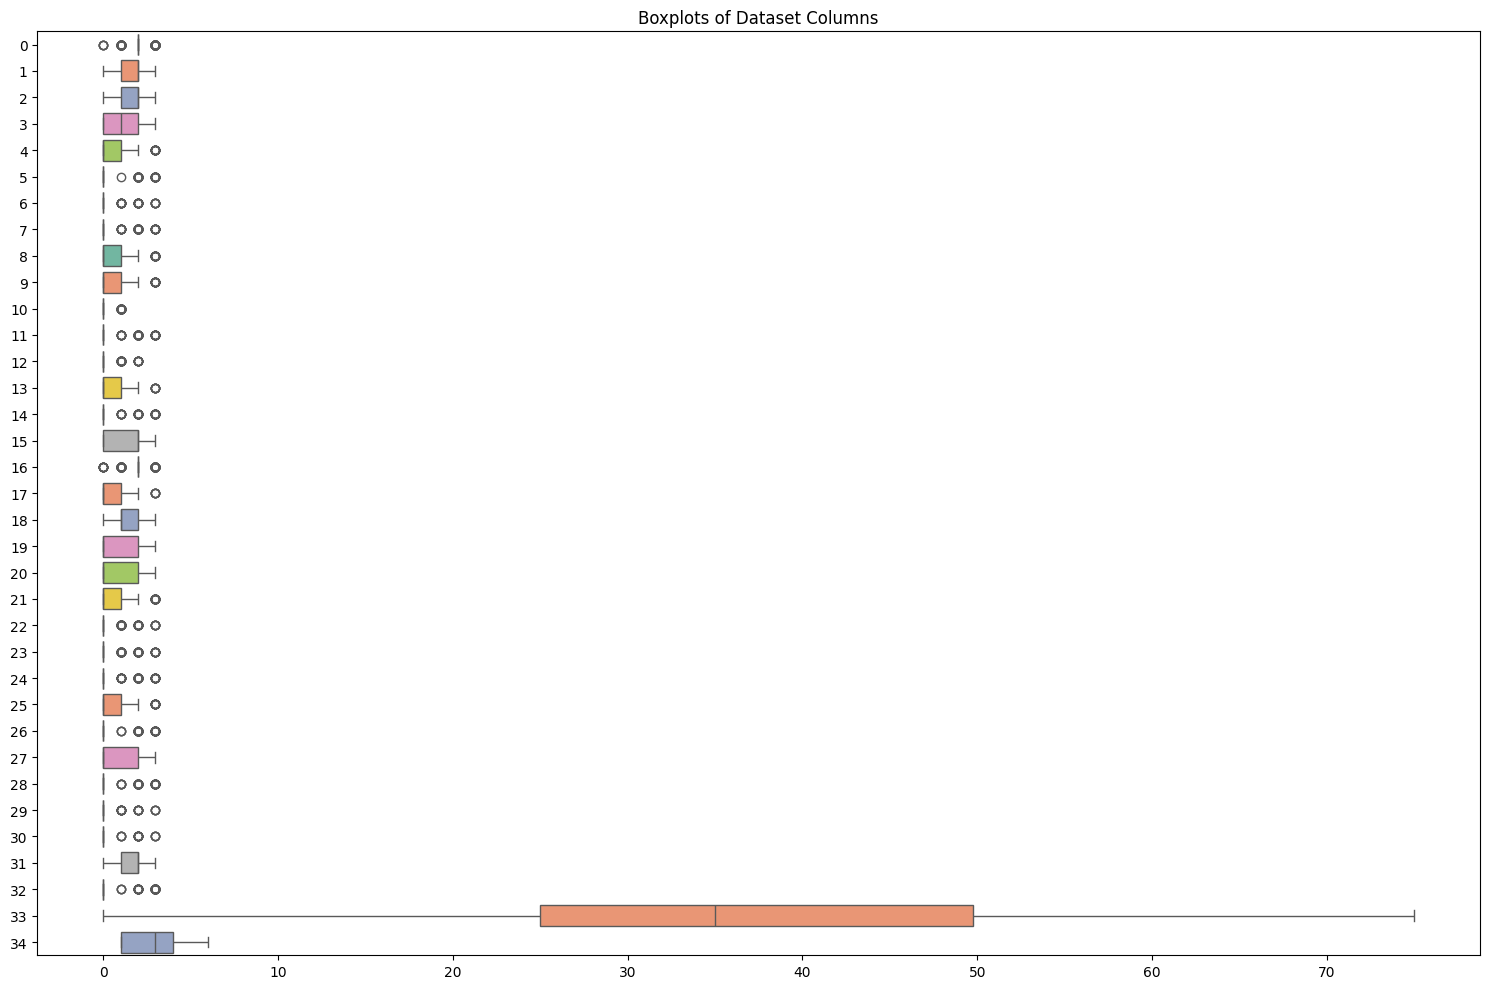

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better aesthetics

# Assuming 'data' is your DataFrame
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.boxplot(data=data, orient="h", palette="Set2")  # Use seaborn for horizontal boxplots with color palette
plt.title("Boxplots of Dataset Columns")
plt.tight_layout()  # Apply tight layout
plt.show()